In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('/Users/mahimaadvilkar/Downloads/DC-ClusteredDataa.csv')
df.head()

,STATE,CITY,LOCATION,ENERGY,AREA,IT EQUIPMENT POWER,State_Aggregated_PUE,FULL_CABINETS,PARTIAL_CABINETS,SHARED_RACKSPACE,...,BUILD_TO_SUIT,FOOTPRINTS,REMOTE_HANDS,YEAR_OPERATIONAL,INTERNET_EXCHANGE_POINTS,State_Aggregated_IXP_Count,LOCATION_ID,Cluster,PCA1,PCA2
0,FL,Miami,36 NE 2nd St (MIA10),1.3,10200,0.91,1.8,True,True,True,...,True,True,True,1925,6,7,1,2,-3.014297,3.591258
1,FL,Miami,RadiusDC Miami I,9.2,15795,6.44,1.8,True,True,True,...,True,True,True,2001,6,7,2,2,-2.538831,3.165288
2,FL,Miami,Volico Miami 2,10.0,5000,7.00,1.8,True,True,True,...,True,True,True,1925,6,7,3,2,-2.853841,3.441460
3,FL,Miami,Raeden MIA2,3.0,32000,2.10,1.8,True,True,True,...,True,True,True,2006,6,7,4,2,-2.584746,3.006199
4,FL,Orlando,CoreSite Orlando (OR1),7.0,130000,4.90,1.8,True,True,True,...,False,True,True,1984,3,7,5,2,-1.855385,3.419699


In [ ]:
#Data Centers by City

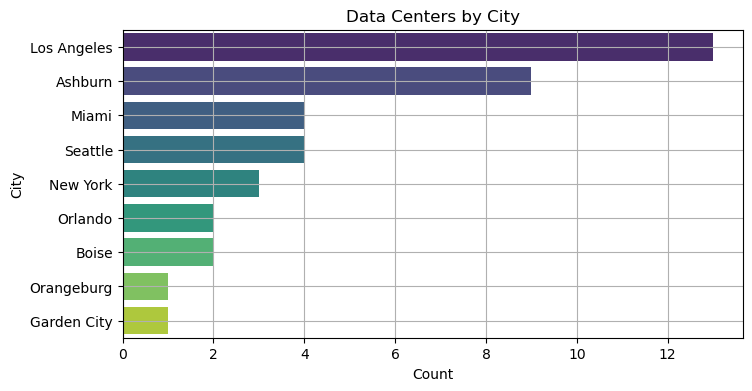

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(y=df['CITY'], order=df['CITY'].value_counts().index, palette='viridis')
plt.title('Data Centers by City')
plt.xlabel('Count')
plt.ylabel('City')
plt.grid(True)
plt.show()


In [ ]:
##Data Centers by State

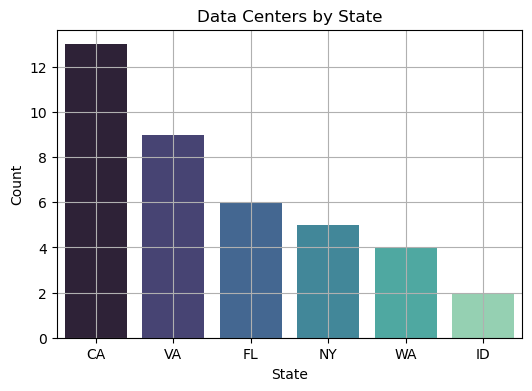

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['STATE'], order=df['STATE'].value_counts().index, palette='mako')
plt.title('Data Centers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [9]:
# Plot - Feature Availability (Boolean Columns)

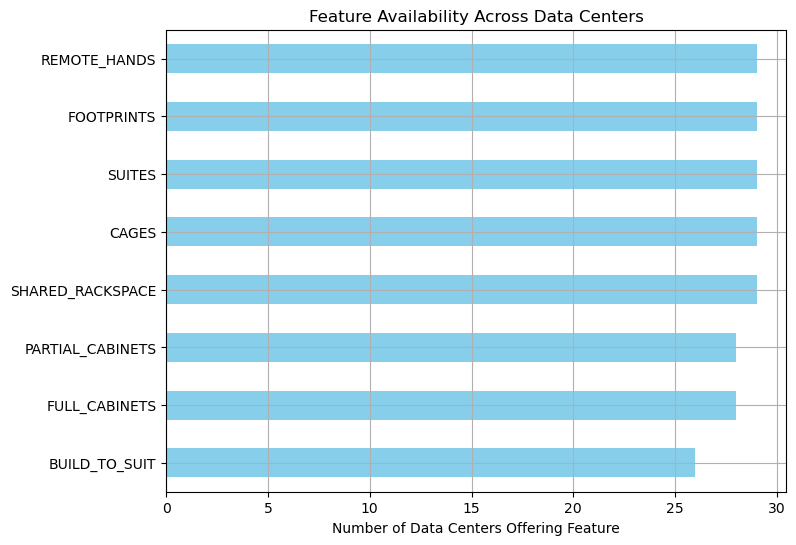

In [10]:
bool_cols = df.select_dtypes(include=['bool']).columns
feature_counts = df[bool_cols].sum().sort_values()

plt.figure(figsize=(8, 6))
feature_counts.plot(kind='barh', color='skyblue')
plt.title('Feature Availability Across Data Centers')
plt.xlabel('Number of Data Centers Offering Feature')
plt.grid(True)
plt.show()


In [ ]:
#Plot - Distributions of Key Numeric Features

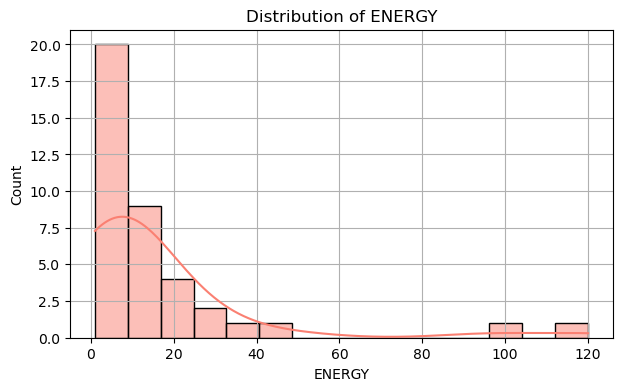

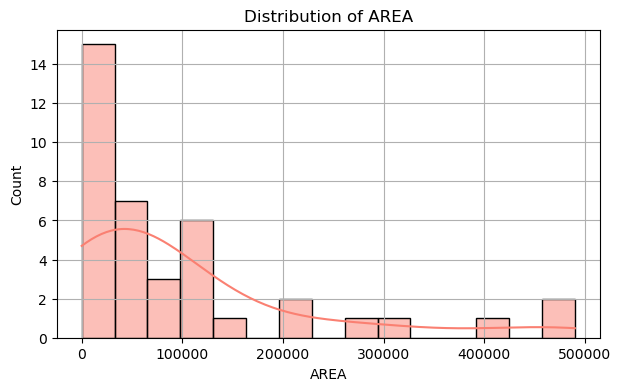

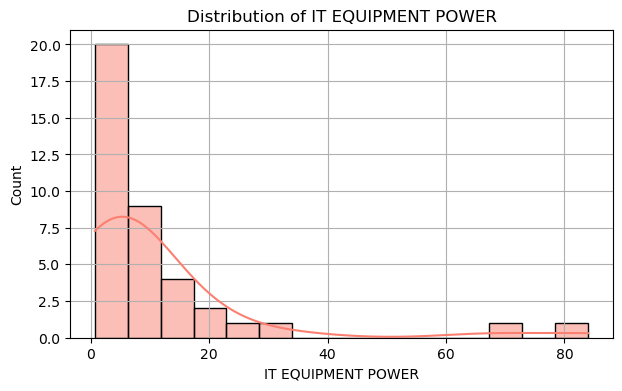

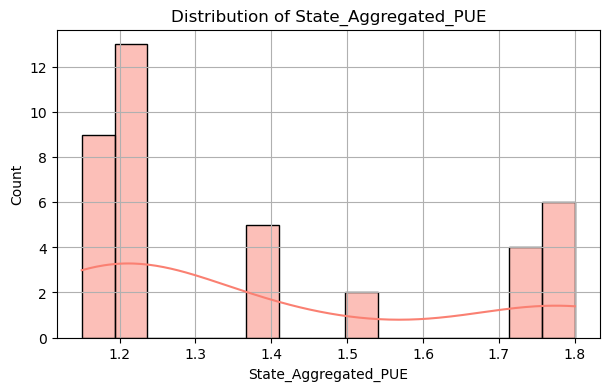

In [11]:
num_cols = ['ENERGY', 'AREA', 'IT EQUIPMENT POWER', 'State_Aggregated_PUE']

for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=15, kde=True, color='salmon')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [ ]:
#Plot - Year of Operation

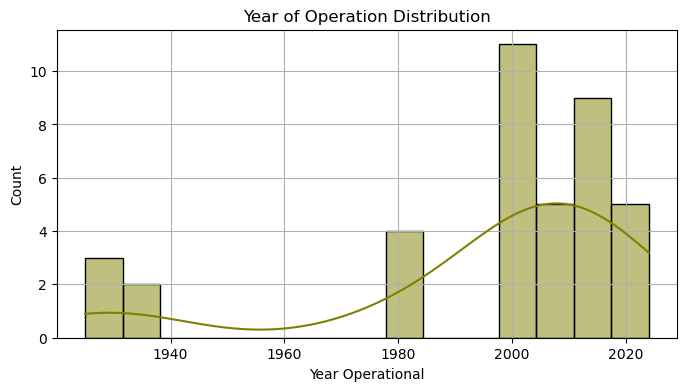

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['YEAR_OPERATIONAL'], bins=15, color='olive', kde=True)
plt.title('Year of Operation Distribution')
plt.xlabel('Year Operational')
plt.grid(True)
plt.show()


In [ ]:
#Correlation Heatmap (Numerical Features) how variables like ENERGY, AREA, and POWER relate to each other.

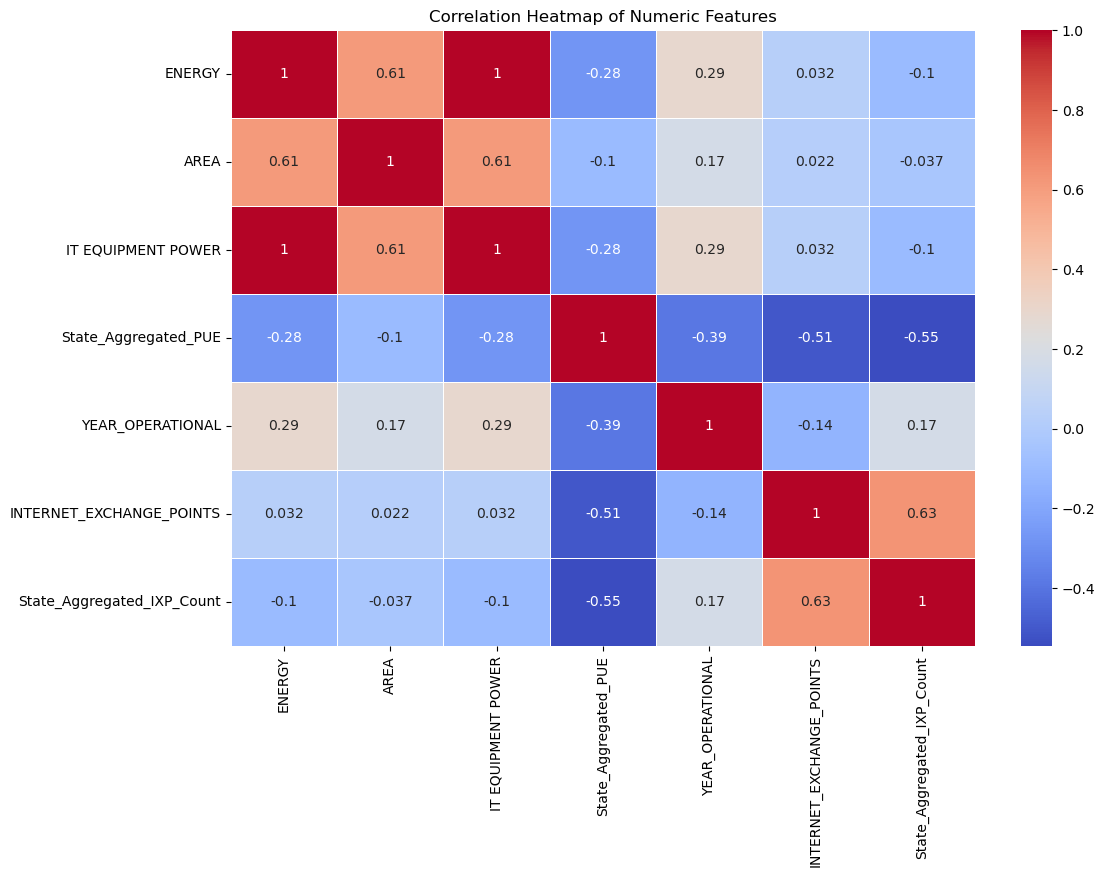

In [13]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Cluster', 'PCA1', 'PCA2', 'LOCATION_ID'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
#Boxplots by State or City (ENERGY, AREA, etc.) useful for comparing performance or infrastructure density.

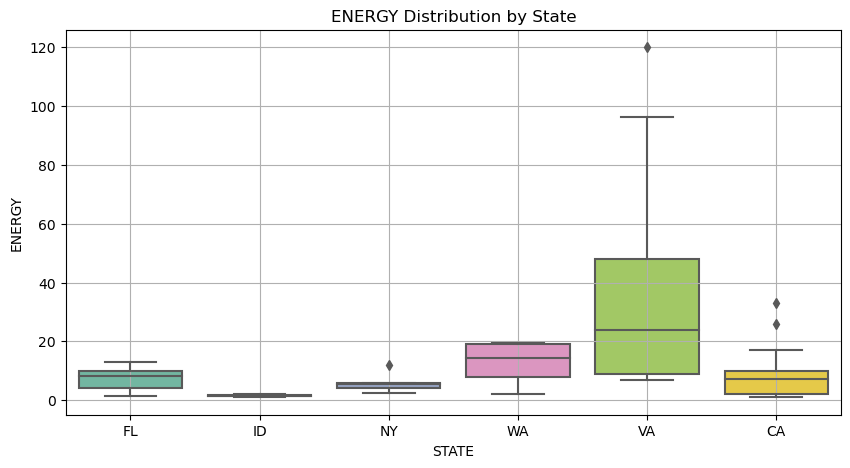

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='STATE', y='ENERGY', palette='Set2')
plt.title('ENERGY Distribution by State')
plt.grid(True)
plt.show()


In [ ]:
#Infrastructure Feature Count per Location (Stacked Bars) how many "infra" features a city/state offers.

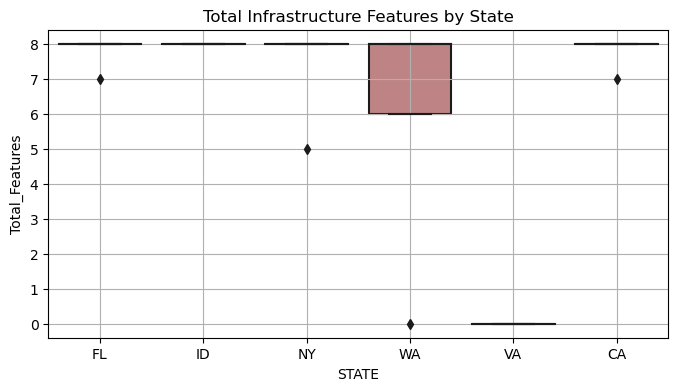

In [15]:
# Create a column with total features per row
df['Total_Features'] = df[bool_cols].sum(axis=1)

plt.figure(figsize=(8, 4))
sns.boxplot(x='STATE', y='Total_Features', data=df, palette='cubehelix')
plt.title('Total Infrastructure Features by State')
plt.grid(True)
plt.show()


In [ ]:
#Clusters in PCA Space

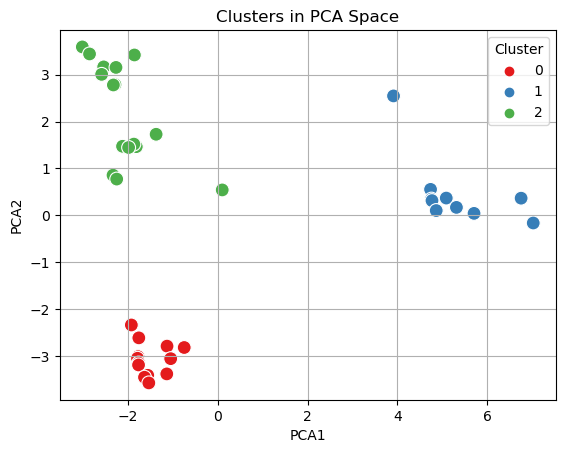

In [17]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title('Clusters in PCA Space')
plt.grid(True)
plt.show()
